<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%A9%EB%B6%88%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%ACD_%EC%9D%80%ED%8F%89%EA%B3%A02024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,121 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and dire

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# 첫 5줄을 봅니다.
df.head(4)

,학번,이름,지역,대학,지원시기,전형명,계열,모집단위,1단계,최종,...,선택2_백분위,선택2_등급,한국사_등급,제2외국어_과목명,제2외국어_등급,표점합수능,백분위수능,등급수능,이름_대학_모집단위_최종_표점합수능_백분위수능_등급수능,대학_모집단위_최종_표점합수능_백분위수능_등급수능
0,30101,김가영,서울,강서대,수시,교과우수자,인문,사회복지학과,NaN,불,...,31.0,6.0,8.0,NaN,NaN,249,23.7,6.5,김가영 강서대 사회복지학과 불/249점 23.7% 6.5등급,강서대 사회복지학과 불/249점 23.7% 6.5등급
1,30101,김가영,서울,경기대(서울),수시,KGU학생부종합,인문,관광문화콘텐츠학과,불,불,...,31.0,6.0,8.0,NaN,NaN,249,23.7,6.5,김가영 경기대(서울) 관광문화콘텐츠학과 불/249점 23.7% 6.5등급,경기대(서울) 관광문화콘텐츠학과 불/249점 23.7% 6.5등급
2,30101,김가영,서울,삼육대,수시,세움인재,인문,글로벌한국학과,불,불,...,31.0,6.0,8.0,NaN,NaN,249,23.7,6.5,김가영 삼육대 글로벌한국학과 불/249점 23.7% 6.5등급,삼육대 글로벌한국학과 불/249점 23.7% 6.5등급
3,30101,김가영,경기,안양대,수시,아리학생부교과,인문,행정학과(야),NaN,합,...,31.0,6.0,8.0,NaN,NaN,249,23.7,6.5,김가영 안양대 행정학과(야) 합/249점 23.7% 6.5등급,안양대 행정학과(야) 합/249점 23.7% 6.5등급


시작등급을 입력하세요: 1
끝 등급을 입력하세요: 9
구간 크기를 입력하세요: 1


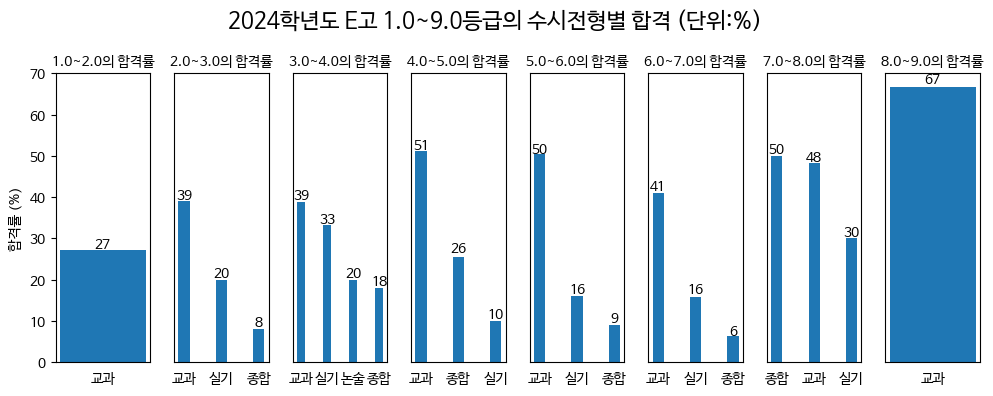

In [ ]:
#70. 수시전형 내신구간별 합격률

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

# 최저 등급과 최고 등급을 입력받기
min_grade = float(input("시작등급을 입력하세요: "))
max_grade = float(input("끝 등급을 입력하세요: "))

# 구간 크기 입력받기
interval_size = float(input("구간 크기를 입력하세요: "))

# 최저 등급부터 최고 등급까지 구간별로 반복
fig, axes = plt.subplots(1, int((max_grade - min_grade) / interval_size), figsize=(10, 4), sharey=True)  # 서브플롯 생성
for i, grade in enumerate(np.arange(min_grade, max_grade, interval_size)):
    mx = grade + interval_size
    mi = grade

    # mx이상 mi이하 조건을 충족하는 객체 만들기
    df_interval = df[(df.전과목 >= mi) & (df.전과목 < mx) & ~(df.전형분류 == '수능')].copy()

    # '전형분류'별 지원 건수 계산
    grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

    # '전형분류'별 합격 건수 계산
    grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')

    # 합치기
    grouped = pd.merge(grouped, grouped_pass, on='전형분류')

    # 합격률 계산
    grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

    # 그래프를 grouped['합격률'] 값의 내림차순으로 배치
    grouped = grouped.sort_values(by='합격률', ascending=False)

    # Plotting
    ax = axes[i]
    bars = ax.bar(grouped['전형분류'], grouped['합격률'], width=0.3)
    if i == 0:
        ax.set_ylabel('합격률 (%)')  # y 레이블은 첫 번째 서브플롯에만 표시
    ax.set_title(f'{mi}~{mx}의 합격률', fontsize=10)
    ax.set_xticks(np.arange(len(grouped['전형분류']))) # x축 틱 위치 설정
    ax.set_xticklabels(grouped['전형분류'])  # x축 레이블 회전


    # x축 tick 삭제
    ax.tick_params(axis='x',          # 적용할 축
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=True)  # labels along the bottom edge are on


    # y축 tick 삭제
    if i != 0:
        ax.tick_params(axis='y',          # 적용할 축
                    which='both',      # both major and minor ticks are affected
                    left=False,      # ticks along the bottom edge are off
                    right=False,         # ticks along the top edge are off
                    labelleft=False)  # labels along the bottom edge are on

    # 각 막대 위에 값을 표시
    for bar in bars:
        yval = round(bar.get_height())  # 반올림
        ax.text(bar.get_x() + bar.get_width()/2, yval-0.3, yval, ha='center', va='bottom')

# 그래프 제목 추가
plt.suptitle(f'2024학년도 E고 {min_grade}~{max_grade}등급의 수시전형별 합격 (단위:%)', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
#71. 모든 전형을 하나로 올인한 학생들

from tabulate import tabulate


# '전형분류' 값이 '교과', '종합', '논술', '실기'인 행만 선택
valid_classifications = ['교과', '종합', '논술', '실기']
df = df[df['전형분류'].isin(valid_classifications)]

# 동일한 '이름'에서 '전형분류' 값이 모두 동일한 행 추출
name_classification_counts = df.groupby('이름')['전형분류'].nunique()
filtered_names = name_classification_counts[name_classification_counts == 1].index

# 필터링된 '이름'을 가진 행만 선택
filtered_df = df[df['이름'].isin(filtered_names)]



# 원하는 열만 선택하여 출력
result_df = filtered_df[['이름', '대학', '모집단위', '전과목', '등급수능', '지원시기', '전형분류', '최종', '전형방법']]


# Define the table headers
table_headers = ['이름', '대학', '모집단위', '전과목', '등급수능', '지원시기', '전형분류', '최종', '전형방법']


# Create the formatted table using tabulate
table_string = tabulate(result_df, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)


#데이터 프레임으로 전환
df_lee_p = pd.DataFrame(result_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_d/'
df_lee_p.to_excel(excel_writer= f'{path}몰빵한학생.xlsx')

In [ ]:
#72. 논술, 종합으로만 쓴 학생들

from tabulate import tabulate


# '전형분류' 값이 '교과', '종합', '논술', '실기'인 행만 선택
valid_classifications = ['교과', '종합', '논술', '실기']
df = df[df['전형분류'].isin(valid_classifications)]

# 동일한 '이름'에서 '전형분류' 값이 모두 동일한 행 추출
name_classification_counts = df.groupby('이름')['전형분류'].nunique()
filtered_names = name_classification_counts[name_classification_counts == 1].index

# 필터링된 '이름'을 가진 행만 선택
filtered_df = df[df['이름'].isin(filtered_names)]


#교과, 실기 제외
filtered_df = filtered_df[~filtered_df['전형분류'].isin(['교과', '실기'])]


#중복제외
filtered_df_num = len(filtered_df.drop_duplicates('이름'))


#내신으로 오름차순
filtered_df = filtered_df.sort_values(by='등급수능')


#내신 소수점 한자리
filtered_df['등급수능'] = filtered_df['등급수능'].round(1)


# 원하는 열만 선택하여 출력
result_df = filtered_df[['이름', '대학', '모집단위', '등급수능', '지원시기', '전형분류', '최종']]


# Define the table headers
table_headers = ['이름', '대학', '모집단위', '등급수능', '지원시기', '전형분류', '최종']


# Create the formatted table using tabulate
print(f"6종합 6논술 학생은 {filtered_df_num}명")

table_string = tabulate(result_df, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)


#데이터 프레임으로 전환
df_lee_p = pd.DataFrame(result_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_d/'


df_lee_p.to_excel(excel_writer= f'{path}종합6논술6학생_이름제외.xlsx')

6종합 6논술 학생은 3명
****************************************************************************************************************************
     이름    대학            모집단위                        등급수능  지원시기    전형분류    최종
495  이민우  국민대          산림환경시스템학과                   4.5  수시        종합        불
496  이민우  서울과기대      환경공학과                           4.5  수시        종합        불
497  이민우  가톨릭대(성심)  에너지환경공학과                     4.5  수시        종합        합
498  이민우  인하대          해양과학과                           4.5  수시        종합        불
499  이민우  인하대          해양과학과                           4.5  수시        종합        합
500  이민우  부산대          해양학과                             4.5  수시        종합        합
 27  김여진  건국대          의생명공학과                         4.9  수시        종합        불
 28  김여진  동덕여대        보건관리학전공                       4.9  수시        종합        불
 29  김여진  서울여대        생명환경공학과                       4.9  수시        종합        불
  5  김나윤  국민대          식품영양학과                       nan    수시 

In [ ]:
#73. 과목별 등급계산

import pandas as pd


# 데이터 로드
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')



# '이름' 열 기준으로 중복을 제외하고 나머지 계산
df_unique = df.drop_duplicates(subset='이름')


# 구간별 빈도와 비율을 계산하는 함수
def calculate_frequency_and_percentage(df, columns):
    result = {}
    for col in columns:
        frequency = df[col].value_counts().sort_index()
        percentage = (frequency / len(df)) * 100
        percentage = percentage.round().astype(int)
        result[col] = pd.DataFrame({
            '빈도(명)': frequency,
            '비율(%)': percentage
        })
    return result


# 구간별 빈도와 비율 계산
columns = ['국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급']
result = calculate_frequency_and_percentage(df_unique, columns)

# 결과 출력
for col, stats in result.items():
    print(f"2024학년도 은평고 수능 {col} ===")
    print(stats)
    print("\n")

# 모든 결과를 하나의 데이터프레임으로 병합
merged_result = pd.concat(result, axis=1)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_d/'
merged_result.to_excel(excel_writer=f'{path}수능과목별등급비율_2024학년도.xlsx')

print("엑셀 파일 저장이 완료되었습니다.")

2024학년도 은평고 수능 국어_등급 ===
       빈도(명)  비율(%)
국어_등급              
1.0        2      2
2.0        4      4
3.0        3      3
4.0        8      7
5.0       17     15
6.0       21     19
7.0       14     12
8.0       13     12
9.0        8      7


2024학년도 은평고 수능 수학_등급 ===
       빈도(명)  비율(%)
수학_등급              
2.0        3      3
3.0        5      4
4.0       10      9
5.0       18     16
6.0       16     14
7.0       18     16
8.0       13     12
9.0        6      5


2024학년도 은평고 수능 영어_등급 ===
       빈도(명)  비율(%)
영어_등급              
1.0        1      1
2.0        9      8
3.0       18     16
4.0       16     14
5.0       10      9
6.0       13     12
7.0       10      9
8.0        9      8
9.0        4      4


2024학년도 은평고 수능 선택1_등급 ===
        빈도(명)  비율(%)
선택1_등급              
1.0         1      1
2.0         7      6
3.0         7      6
4.0        13     12
5.0        20     18
6.0        19     17
7.0        11     10
8.0        10      9
9.0         1      1


2024학년도 은평고 수능 선택2_등

In [ ]:
#선택과목 비율

import pandas as pd


# 데이터 로드
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# '선택_과목명' 열 생성
#df['선택_과목명'] = df['선택1_과목명'].append(df['선택2_과목명']).reset_index(drop=True)
df['선택_과목명'] = pd.concat([df['선택1_과목명'], df['선택2_과목명']], ignore_index=True)


# 선택_과목명에 대한 빈도와 비율 계산 함수
def calculate_frequency_and_percentage(df, column):
    frequency = df.groupby(column).size()
    percentage = (frequency / len(df) * 100).round().astype(int)
    result_df = pd.DataFrame({
        '빈도': frequency,
        '비율(%)': percentage
    })
    return result_df

# 선택_과목명에 대한 빈도와 비율 계산
result_선택 = calculate_frequency_and_percentage(df, '선택_과목명')

# 결과 출력
print("=== 선택_과목명 ===")
print(result_선택)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_d/'
result_선택.to_excel(excel_writer=f'{path}선택_과목명_빈도와_비율.xlsx', sheet_name='선택_과목명_결과')

print("엑셀 파일 저장이 완료되었습니다.")

=== 선택_과목명 ===
         빈도  비율(%)
선택_과목명            
경제        6      1
동아시아사    12      2
사회문화    158     20
생명과학1    67      9
생활과윤리   151     20
세계사      11      1
세계지리     36      5
윤리와사상    33      4
정치와법     10      1
지구과학1    65      8
한국지리      6      1
화학1      21      3
엑셀 파일 저장이 완료되었습니다.


In [ ]:
# 지역별로 최종 열의 빈도 계산
result = df.groupby(['지역', '최종']).size().unstack(fill_value=0)

# '합격률' 열 추가 (합격 수 / (합격 수 + 불합격 수))
result['합격률(%)'] = result['합'] / (result['합'] + result['불']) * 100


#합격률을 반올림하여 정수로
result['합격률(%)'] = result['합격률(%)'].round().astype(int)

# 결과 출력
print(result)

최종    불    합  합격률(%)
지역                  
강원    7    8      53
경기  184  104      36
경북    3    4      57
광주    2    7      78
대구    1    0       0
대전    8    4      33
부산    1    1      50
서울  246  103      30
세종    2    1      33
인천   14    8      36
전남    0    4     100
전북    5    7      58
충남   26    6      19
충북    8    5      38


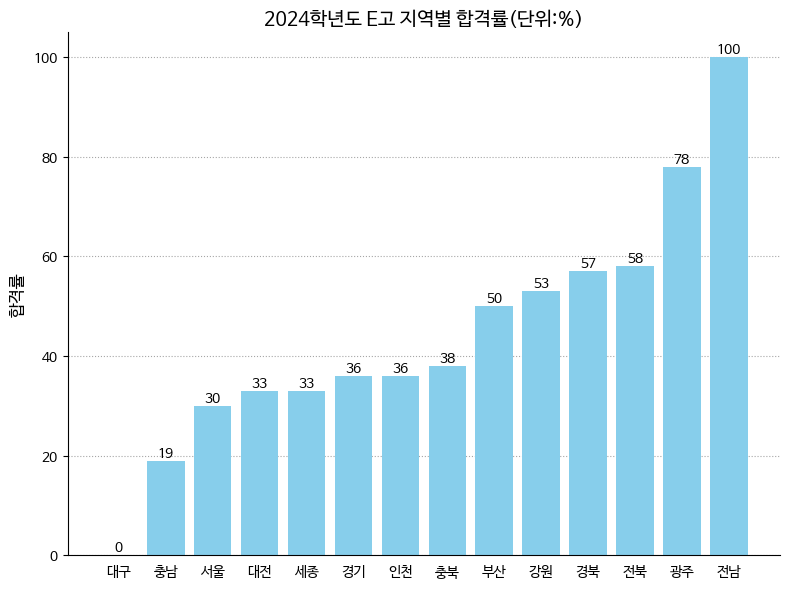

In [ ]:
#73. 지역별 합격률

import pandas as pd
import matplotlib.pyplot as plt


# 지역별로 최종 열의 빈도 계산
result = df.groupby(['지역', '최종']).size().unstack(fill_value=0)

# '합격률' 열 추가 (합 수 / (합 수 + 불 수))
result['합격률(%)'] = result['합'] / (result['합'] + result['불']) * 100

# 합격률을 반올림하여 정수로
result['합격률(%)'] = result['합격률(%)'].round().astype(int)

# 합격률에 따라 오름차순으로 정렬
result_sorted = result.sort_values(by='합격률(%)')

# 세로형 막대그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(result_sorted.index, result_sorted['합격률(%)'], color='skyblue')

# 막대에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height()}', ha='center', va='bottom')

# 그래프의 일부 테두리선 제거
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 위쪽 테두리 제거
ax.spines['right'].set_visible(False)  # 오른쪽 테두리 제거

# 왼쪽 텍스트에서 가로 점선 그리기
ax.yaxis.grid(True, linestyle=':', color='gray', alpha=0.7)
ax.set_axisbelow(True)  # 점선을 막대 뒤로 보내기

# 그래프 제목 및 레이블 설정
plt.title('2024학년도 E고 지역별 합격률(단위:%)', fontsize=14)
plt.ylabel('합격률', fontsize=12)
#plt.xlabel('지역', fontsize=12)


# x축의 tick 제거
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom= True)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

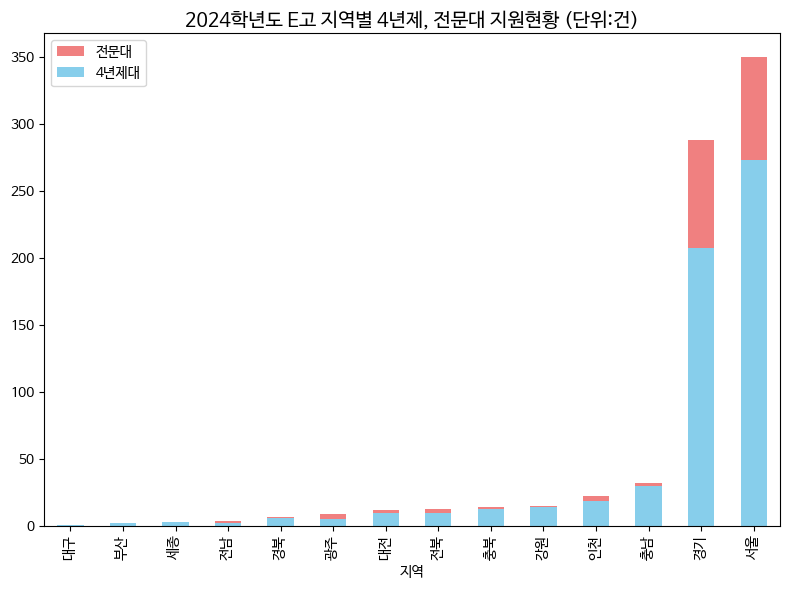

In [ ]:
#74. 4년제, 전문대 지원현황

import pandas as pd
import matplotlib.pyplot as plt


# 1. '대학' 열에서 '대학교'로 끝나는 값의 빈도 계산
df['대학교'] = df['대학'].str.endswith('대학교')


# 2. '대학교'로 끝나는 값을 '전문대' 열로, 그 외 값을 '4년제대'라는 새로운 열에 저장
df['전문대'] = df['대학'].apply(lambda x: 1 if x.endswith('대학교') else 0)
df['4년제대'] = df['대학'].apply(lambda x: 1 if not x.endswith('대학교') else 0)


# 지역별로 최종 열의 빈도 계산 및 합계
result = df.groupby('지역').agg({'전문대': 'sum', '4년제대': 'sum'})


# 4. 빈도 합계에 따라 오름차순 정렬
result['합계'] = result['전문대'] + result['4년제대']
result_sorted = result.sort_values(by='합계')

# 5. 막대그래프를 '4년제대'가 아래에 위치하도록 stack하여 그리기
ax = result_sorted[['4년제대', '전문대']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])


# 그래프 제목 및 레이블 설정
plt.title('2024학년도 E고 지역별 4년제, 전문대 지원현황 (단위:건)', fontsize=14)
#plt.ylabel('빈도 수', fontsize=12)
#plt.xlabel('지역', fontsize=12)

# 범례 순서를 '전문대', '4년제대'로 바꾸기
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], ['전문대', '4년제대'])


# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()